<h1><center> Mapping the Seafloor: For Instructor</center></h1>

## Overview
For this activity, students will be using a waterproof version of the **HCSR04** 40 kHz ultrasonic sensor called a **JSN-SR04** to determine the bathymetry of a body of water.  The JSN-SR04 sensor sends out a pulse of sound through one transducer, and listens for the echo return in the second transducer. Based on the delay between sending the signal and receiving an echo back, you can determine how far away an object is from the sensor.

We recommend the following activity milestones for the students:
1. Submit your figure of the bathymetry along the dock
2. Submit the python code used to create your figure

In addiition, students should provide a 2-3 sentence response addressing the following questions:
- Why might you have gotten inconsistent readings when taking measurements off of the dock?
- If you were to use an underwater echosounder in Puget Sound instead of Portage Bay, how and why might you expect the speed of sound to differ?

## Assembling your HCSR04 Sensor
Begin by connecting your **JSN-SR04** to your **ESP8266**.  The JSN-SR04 requires 5 volts, so for this excersize you will use your microcontroller in a breadboard, powered by the USB cable from your computer.  The USB cable provides 5V to the board, which means we can use the *V+* pin on the ESP8266 to give 5V to the JSN-SR04.

The JSN-SR04 sensor has 4 pins, *GND*, *VCC*, *Trig*, and *Echo*.  For this excercise, connect the *trig* pin on the JSN-SR04 to GPIO \#12 on the ESP8266, and the *echo* pin to GPIO \#14.  Connect *GND* to *GND* and *VCC* to *V+*.

The driver for this sensor is already included in the firmware on your **ESP8266** as a module named `hcsr04`.  The `hcsr04.HCSR04` class requires three input variables:
- `trigger_pin`,  the GPIO pin on the ESP8266 corresponding to the **Trig** pin on the JSN-SR04
- `echo_pin`,  the GPIO pin on the ESP8266 corresponding to the **Echo** pin on the JSN-SR04
- `c`, the speed of sound to use to calculate distance

We will begin by estimating that the speed of sound in water is **1500 meters per second**, so we will set our variable `c` to 300 and we can define our sensor using the following code:

`import hcsr04
sensor = hcsr04.HCSR04(trigger_pin = 12, echo_pin = 14, c = 1500)`


## Measuring Distance
Once your sensor variable is defined, you can take a measurement by executing the function `distance`:

`sensor.distance()`

Your ESP8266 should return a float value that corresponds to the distance of the object in front of the sensor in **millimeters**.  Try pointing your sensor at an object, moving it closer and further away while taking measurements to see how the value changes.

## Bathymetry Measurements
You will be using the HCSR04 to collect measurements of depth at a series of fixed positions along the dock.  Using the tape measure, start at the western corner of the dock and sample every 2 meters moving east.  At each sampling location, lower the transducer into the water to the tape mark indicating 10cm is at the surface.  Collect five samples at each fixed distance point.  Record your data in the following format:


|Distance on Dock (m) | Depth (mm)|
|----|----|
|1| Measurement \#1,  \#2,  \#3,  \#4,  \#5|
|2| Measurement \#1,  \#2,  \#3,  \#4,  \#5|
|...|...|
|*n*| Measurement \#1,  \#2,  \#3,  \#4,  \#5|

Are your measurements at every sampling locations consistent?  Do all of the values collected appear to be valid?

Once your sample table is complete, create a plot of the bathymetry in *Canopy* using the Python code below.  For the depth value at each sampling location, take the median of the measurements at each distance that you believe to be correct in order to remove bad samples or noise.  

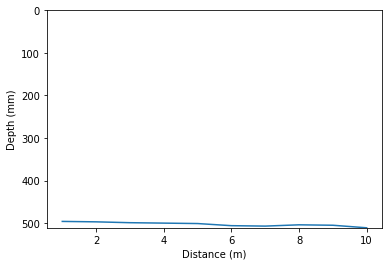

In [4]:
import matplotlib.pyplot as plt # Import the pyplot library
import numpy as np # Import the numpy library

# Create an array of values for the distance along the dock
Distance = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# Create an array of values for the distance measured by the sensor (in mm)
Depth = np.array([396.0, 397.0, 399.0, 400.0, 401.0, 406.0, 407.0, 404.0, 405.0, 411.0])
Depth = Depth+100. # Add 10cm to the measurements to correct for the depth of the transducer
plt.plot(Distance,Depth) # Plot the depth at each distance
plt.ylim((0,max(Depth))) # Set the y-axis limits
plt.gca().invert_yaxis() # Invert the y-axis so the water surface is at the top of the figure
plt.xlabel('Distance (m)') # Label the x-axis
plt.ylabel('Depth (mm)') # Label the y-axis
plt.show() # Show the figure

What features, if any, do you see along the bottom?  